## This program helps to fit a Mie potential to Sphor model for water metal interaction

###  Sphor Model for Water-Au interaction
\begin{equation}
U_\mathrm{M-Water} = U_\mathrm{M-O} + U_\mathrm{M-H1} + U_\mathrm{M-H2}
\end{equation}
#### Metal - Oxygen interaction:
\begin{equation}
U_\mathrm{M-O}(r) = D_0\left[\exp(-2\beta_O(r-r_\mathrm{e1}))-2\exp(-\beta_O(r-r_\mathrm{e1}))\right]
\end{equation}
#### Metal - Hydrogen interaction:
\begin{equation}
U_\mathrm{M-H} = \gamma D_0 \exp(-2\beta_H(r-r_\mathrm{e2}))
\end{equation}

### The parameters for the Sphor model are:
\begin{eqnarray}
D_0 & = & 6.68\times 10^{-2}\,\mathrm{eV}\\
\beta_O & = & 13.0\,\mathrm{nm^{-1}}\\
\beta_H & = & 13.0\,\mathrm{nm^{-1}}\\
r_\mathrm{e1} & = & 0.37\,\mathrm{nm}\\
r_\mathrm{e2} & = & -0.1\,\mathrm{nm}\\
\gamma & = & 0.2
\end{eqnarray}

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
D0 = 6.68e-2
bo = 13.0 * 0.1 # IN Ang^{-1}
bh = 13.0 * 0.1
re1 = 0.37 * 10 # In Ang
re2 = -0.1 * 10
gamma = 0.2

In [106]:
r = np.linspace(1,6,10000)

In [107]:
def sphor(r):
    return D0 * (np.exp(-2 * bo * (r - re1)) - 2 * np.exp(-bo * (r - re1)))
    

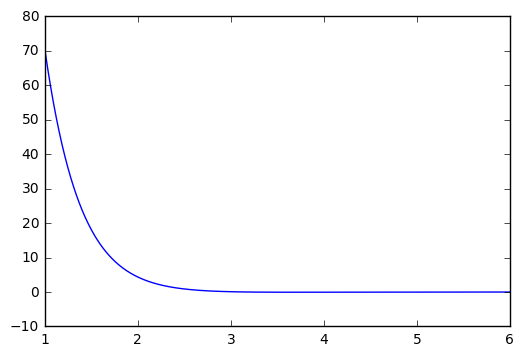

In [108]:
pec = sphor(r)
plt.plot(r, pec)
plt.show()

## Mie Potential
\begin{equation}
U_\mathrm{Mie}(r) = \left(\frac{n}{n-m}\right)\left(\frac{n}{m}\right)^\frac{m}{n-m} \epsilon \left[ \left(\frac{\sigma}{r}\right)^n - \left(\frac{\sigma}{r}\right)^m\right]
\end{equation}

In [109]:
n = 11
m = 6

In [110]:
def Mie(r, e, s):
    return (n/(n-m))* (n/m)**(m/(n-m))* e* ((s/r)**n - (s/r)**m)

In [111]:
from scipy.optimize import curve_fit

In [112]:
para, cov = curve_fit(Mie,r, pec, p0 = [-0.1, 3])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [113]:
para

array([ -36.92482853, -116.57724795])

In [114]:
fitted_pec = Mie(r , para[0], para[1])

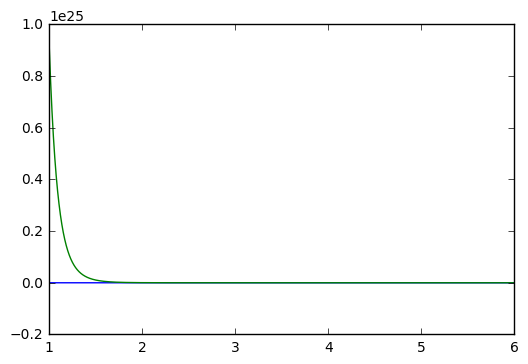

In [115]:
plt.plot(r, pec)
plt.plot(r, fitted_pec)
plt.show()

In [116]:
file = open("../PtWaterAdsorption/Sphur_tune.dat",'w')
for var in range(len(r)):
    file.write("%f\t%f\n"%(r[var],pec[var]))
file.close()

In [120]:
n=10

m=6
(n/(n-m))* (n/m)**(m/(n-m))

5.37914353639919